In [1]:
import os
import pandas as pd

from tqdm import tqdm

In [2]:
DATASET = {"title" : [], "text" : [], "label" : [] }
ROOT = "data/"
datasets = ["data1", "data2", "data3"]

for dataset in datasets:
    for file in os.listdir("{}{}".format(ROOT, dataset)):
        if file[0] != "." and file != "submit.csv" and file != "test.csv":
            full_path = "{}{}/{}".format(ROOT, dataset, file)
            print("Loading from: {}".format(full_path))
            
            data = pd.read_csv(full_path)
            counter = 0
            for index, row in data.iterrows():
                
                if dataset == "data1":
                    label = row.label
                elif dataset == "data2":
                    label = 1 if file == "True.csv" else 0
                elif dataset == "data3":
                    label = 1 if row.label == "REAL" else 0
                
                
                DATASET["title"].append(row.title)
                DATASET["text"].append(row.text)
                DATASET["label"].append(label)

                counter += 1
            
            print("Loaded: {} rows\n".format(counter))

print("Total loaded {} rows\n".format(len(DATASET)))
df = pd.DataFrame(DATASET)

df.head


Loading from: data/data1/train.csv
Loaded: 20800 rows

Loading from: data/data2/True.csv


KeyboardInterrupt: 

In [3]:
df.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [36]:
# Obtain additional stopwords from nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

[nltk_data] Downloading package stopwords to /home/codeyu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codeyu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
print(dataset.dataset["text"][5])

In these trying times, Jackie Mason is the Voice of Reason. [In this week’s exclusive clip for Breitbart News, Jackie discusses the looming threat of North Korea, and explains how President Donald Trump could win the support of the Hollywood left if the U. S. needs to strike first.  “If he decides to bomb them, the whole country will be behind him, because everybody will realize he had no choice and that was the only thing to do,” Jackie says. “Except the Hollywood left. They’ll get nauseous. ” “[Trump] could win the left over, they’ll fall in love with him in a minute. If he bombed them for a better reason,” Jackie explains. “Like if they have no transgender toilets. ” Jackie also says it’s no surprise that Hollywood celebrities didn’t support Trump’s strike on a Syrian airfield this month. “They were infuriated,” he says. “Because it might only save lives. That doesn’t mean anything to them. If it only saved the environment, or climate change! They’d be the happiest people in the wor

In [10]:
# Remove stopwords and remove words with 2 or less characters
def Preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
            
    return result


def CleanData(dataset):
    for i in tqdm(range(len(dataset))):
        if i == 100:
            break
        dataset["clean_words"][i] = Preprocess("{} {}".format(dataset["title"][i], dataset["text"][i]))
        dataset["clean"][i] = " ".join(dataset["clean_words"][i])

def GetListOfWords(dataset):
    list_of_words = []
    for sample_words in dataset["clean_words"]:
        for word in sample_words:
            list_of_words.append(word)
                
    return list(set(list_of_words))

# low = dataset.GetListOfWords()
# len(low)

In [13]:
from DataLoader import DataLoader

ROOT = "data/"
datasets = ["data1", "data2", "data3"]

dataset = DataLoader(ROOT, datasets)
dataset.JoinDatasets()

Loading from: data/data1/train.csv
Loaded: 101 rows

Total loaded 5 rows



In [15]:
dataset.CleanData()

100%|██████████| 101/101 [00:00<00:00, 259.39it/s]


In [16]:
dataset.dataset["clean"][0]

'house aide comey letter jason chaffetz tweeted house aide comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commons license apologies keith olbermann doubt worst person world week director james comey according house democratic aide looks like know second worst person turns comey sent infamous letter announcing looking emails related hillary clinton email server ranking democrats relevant committees hear comey tweet republican committee chairmen know comey notified republican chairmen democratic ranking members house intelligence judiciary oversight committees agency reviewing emails recently discovered order contained classified information long letter went oversight committee chairman jason chaffetz political world ablaze tweet informed learned existence emails appear pertinent investigation case reopened jason chaffetz jasoninthehouse october course know case comey actually sa

In [19]:
low = dataset.GetListOfWords()
print("Dataset contais {} words".format(len(low)))

Dataset contais 10946 words


In [21]:
dataset.dataset.head()

,title,text,label,clean_words,clean
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,"[house, aide, comey, letter, jason, chaffetz, ...",house aide comey letter jason chaffetz tweeted...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,"[flynn, hillary, clinton, woman, campus, breit...",flynn hillary clinton woman campus breitbart f...
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,"[truth, fired, truth, fired, october, tension,...",truth fired truth fired october tension intell...
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,"[civilians, killed, single, airstrike, identif...",civilians killed single airstrike identified v...
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,"[iranian, woman, jailed, fictional, unpublishe...",iranian woman jailed fictional unpublished sto...


<AxesSubplot:xlabel='count', ylabel='label'>

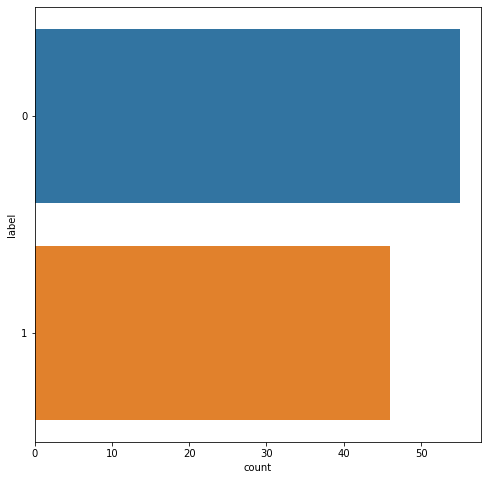

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "label", data = dataset.dataset)

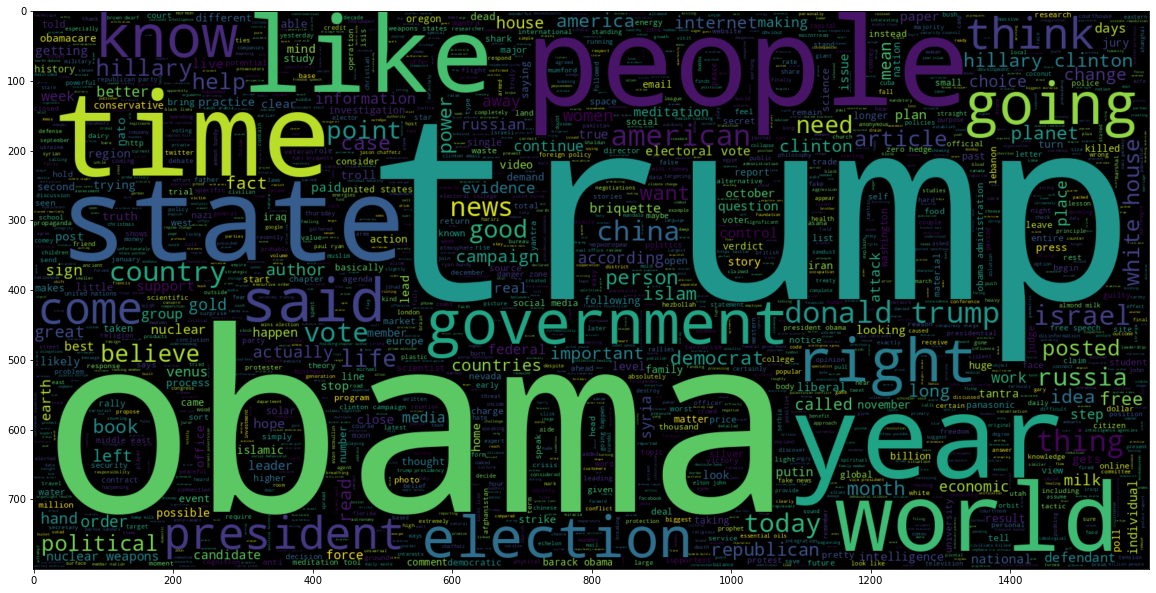

In [31]:
from wordcloud import WordCloud, STOPWORDS
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(dataset.dataset[dataset.dataset.label == 1].clean))
plt.imshow(wc, interpolation = 'bilinear')

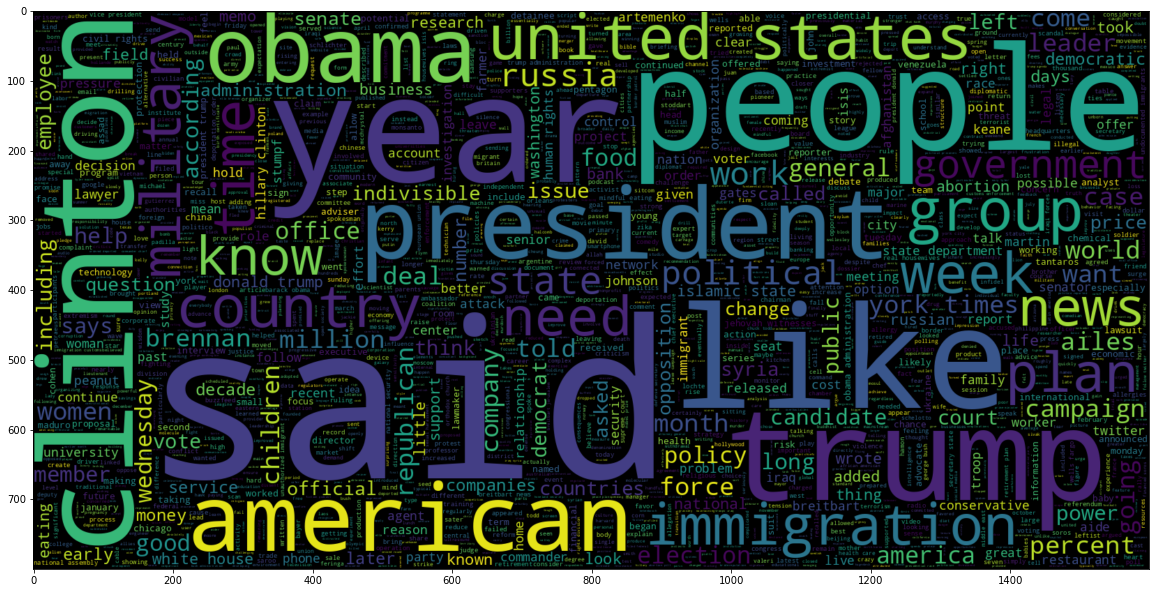

In [32]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(dataset.dataset[dataset.dataset.label == 0].clean))
plt.imshow(wc, interpolation = 'bilinear')

In [33]:
# length of maximum document will be needed to create word embeddings 
maxlen = -1
for doc in dataset.dataset.clean:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 2970


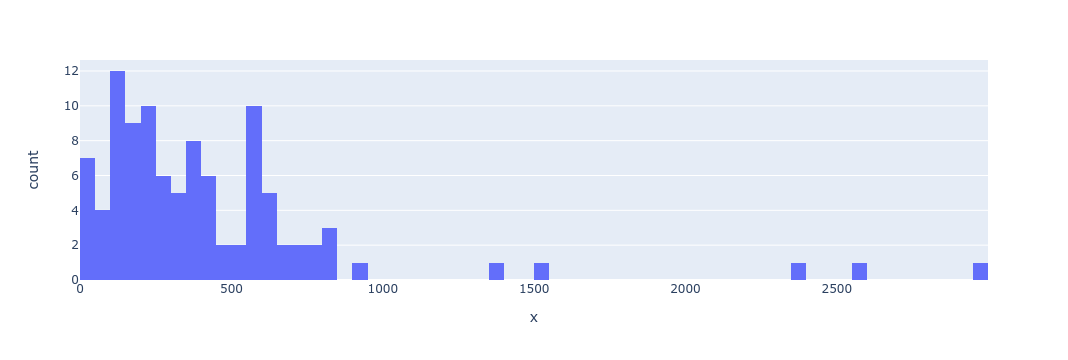

In [37]:
# visualize the distribution of number of words in a text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in dataset.dataset.clean], nbins = 100)
fig.show()

In [1]:
from DataLoader import DataLoader

ROOT = "data/"
datasets = ["data1"]

dataset = DataLoader(ROOT, datasets)

[nltk_data] Downloading package stopwords to /home/codeyu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codeyu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading datasets...
Loading from: data/data1/train.csv


  0%|          | 0/21 [00:00<?, ?it/s]/home/codeyu/dev/school/ZS2021/sasw/zadanie2/DataLoader.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset["clean_words"][i] = self.Preprocess("{} {}".format(self.dataset["title"][i], self.dataset["text"][i]))
/home/codeyu/dev/school/ZS2021/sasw/zadanie2/DataLoader.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset["clean"][i] = " ".join(self.dataset["clean_words"][i])
100%|██████████| 21/21 [00:00<00:00, 302.62it/s]

Loaded: 21 rows

Total loaded 5 rows

Cleaning dataset...
DATASET: train 0.6 test 0.2 val 0.2


In [9]:
for i,doc in enumerate(dataset.train_sequences[:2]):
     print("The padded encoding for document",i+1," is : ",doc[:100])


The padded encoding for document 1  is :  [ 439   37  439   37  303  132  660   13   17  439   37  661  213  662
   37   24  440  304  663  213   78  133   47  664  305 1200   24   24
 1201  440  304    2  665   24  666  306  307  308 1202  441  667 1203
  668  309  442  309    6  113   48  113  310  311 1204  443  134    6
   95   79   96   79   96   58   79   58 1205 1206   96 1207   79  444
  312  311   80  445   11   79 1208   58  446  444  311   80  445   11
  135  136   59  447   96   11   96   58   11   79 1209   48  310   79
 1210  166]
The padded encoding for document 2  is :  [ 224  118  225  331   15  714    7 1339    2  140  118  225  715   30
 1340 1341  224  471   64 1342    7   66   84  472  226   25  227    2
  140   83  141   17  716   50    7  100  228  229  174  119  473  474
   15   31  332   38  717    7   39  718  475  226  217  333 1343   17
  719   67   15  476  175  720  477  478   39  479  721    7  461  119
  480   15  142  176  174  481  473  141   17  722  

In [13]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(len(dataset.list_of_words), output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))

# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         504576    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 800,769
Trainable params: 800,769
Non-trainable params: 0
_________________________________________________________________


In [15]:
y_train = np.asarray(dataset.y_train)
# train the model
model.fit(dataset.train_sequences, y_train, batch_size = 64, validation_split = 0.2, epochs = 2)

Epoch 1/2
1/1 [==============================] - 1s 1s/step - loss: 0.6940 - acc: 0.4444 - val_loss: 0.7033 - val_acc: 0.3333
Epoch 2/2
1/1 [==============================] - 0s 466ms/step - loss: 0.6862 - acc: 0.5556 - val_loss: 0.7094 - val_acc: 0.3333


In [17]:
# make prediction
pred = model.predict(dataset.test_sequences)

In [18]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)


In [20]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(dataset.y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.4


<AxesSubplot:>

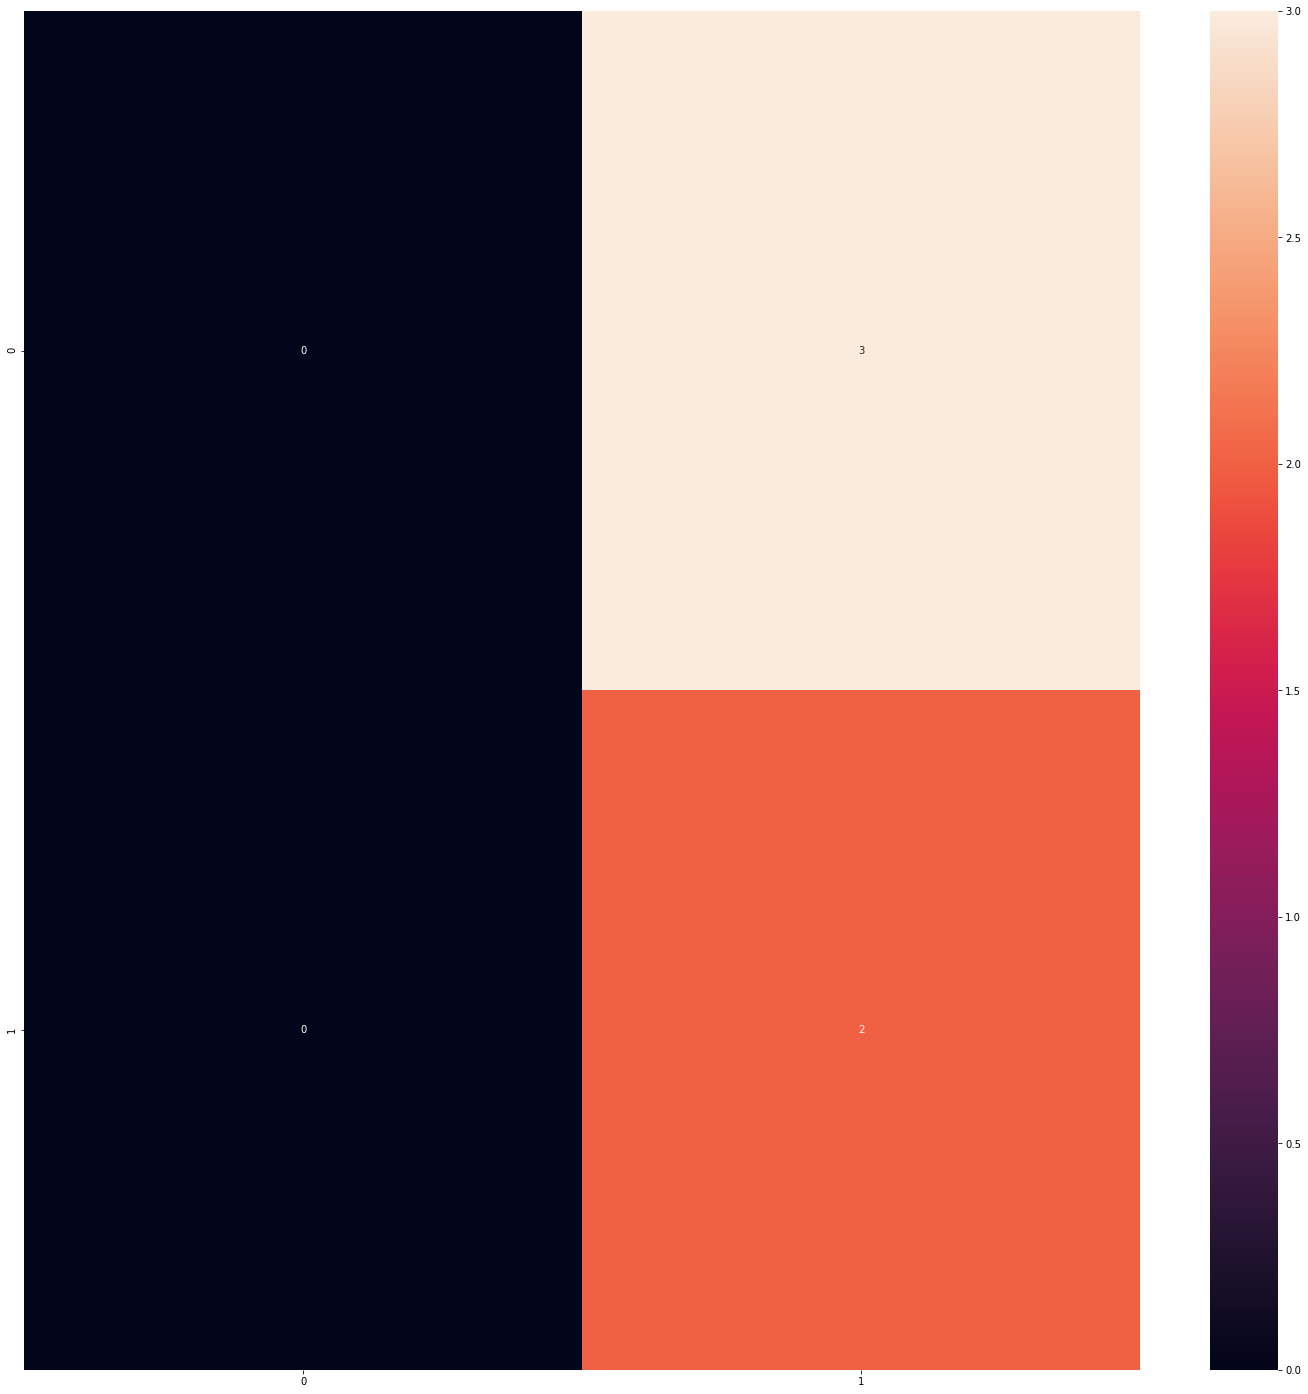

In [23]:
# get the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(dataset.y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)